<a href="https://colab.research.google.com/github/arghads9177/association-rule-real-market/blob/master/association_rule_market_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Market Basket Analysis on Real Market Data

## About Dataset

The purpose of this data science project is to perform a market basket analysins on a purchase records of a market.

Market basket analysis is a data mining technique used by retailers to increase sales by better understanding of customer purchasing patterns. It involves analyzing large data sets, such as purchase history, to reveal product groupings, as well as products that are likely to be purchased together.

## Details of data

The dataset has **464** rows and **22** columns. Each columns contains the item purchased from the market. The values in each column contains binary data i.e. either **1** or **0**, which represents either the item purchased or not by a customer in that purchase. These purchases of items can be analysed and association rules can be generated using Market Basket Analysis by algorithms like **Apriori** Algorithm.

## Data Dictionary

The features of the dataset represents each item are as follows:

* Bread
* Honey
* Bacon
* Toothpaste
* Banana
* Apple
* Hazelnut
* Cheese
* Meat
* Carrot
* Cucumber
* Onion
* Milk
* Butter
* ShavingFoam
* Salt
* Flour
* HeavyCream
* Egg
* Olive
* Shampoo
* Sugar

The datatype of each feature is number containing binary values 0 or 1.

## Market Basket Analysis

Market Basket Analysis stands as a crucial technique employed by major retailers to unveil connections among products. This method involves searching for combinations of items that frequently appear together in customer transactions. In simpler terms, it empowers retailers to pinpoint correlations between the items purchased by customers.

Association Rules are widely used to analyze retail basket or transaction data and are intended to identify strong patterns discovered in transaction data.


## Problem Statement

* Conduct an in-depth Exploratory Data Analysis on a dataset, uncovering insights, patterns, and relationships within the data.
* This will answer the questions like:

    * Which items are frequently bought together?
    * If a user buys an item X, which item is he/she likely to buy next?

## Loading Necessary Libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from mlxtend.frequent_patterns import apriori, association_rules
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

sns.set_style("darkgrid")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Load Dataset and Get what it Contains

In [7]:
import os
folder_path = "drive/MyDrive/Colab Notebooks/dscourse/data"
file_path = os.path.join(folder_path, "market.csv")
df = pd.read_csv(file_path, delimiter=";")

In [8]:
# Show first 5 rows to understand values in the features
df.head()

,Bread,Honey,Bacon,Toothpaste,Banana,Apple,Hazelnut,Cheese,Meat,Carrot,...,Milk,Butter,ShavingFoam,Salt,Flour,HeavyCream,Egg,Olive,Shampoo,Sugar
0,1,0,1,0,1,1,1,0,0,1,...,0,0,0,0,0,1,1,0,0,1
1,1,1,1,0,1,1,1,0,0,0,...,1,1,0,0,1,0,0,1,1,0
2,0,1,1,1,1,1,1,1,1,0,...,1,0,1,1,1,1,1,0,0,1
3,1,1,0,1,0,1,0,0,0,0,...,1,0,0,0,1,0,1,1,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Show shape of the dataset to understand number of rows and columns present in the dataset
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 464
Number of columns: 22


### Observations

* We have **464** basket for us to compute the association for each item that sold in the market. There are **22** items that sold in the market.

#### Checking Data Types

By checking datatype of each column we can identify the categorical and numerical columns present in the dataset.

In [10]:
df.dtypes

Bread          int64
Honey          int64
Bacon          int64
Toothpaste     int64
Banana         int64
Apple          int64
Hazelnut       int64
Cheese         int64
Meat           int64
Carrot         int64
Cucumber       int64
Onion          int64
Milk           int64
Butter         int64
ShavingFoam    int64
Salt           int64
Flour          int64
HeavyCream     int64
Egg            int64
Olive          int64
Shampoo        int64
Sugar          int64
dtype: object

### Observations

* Each column contains numeric values.

#### Missing Value Detection

Missing value detection is essential to chack the quality of the data. If present impute it with proper value so that quality of the data is maintained for robust statistical analysis.

In [11]:
df.isna().sum()

Bread          0
Honey          0
Bacon          0
Toothpaste     0
Banana         0
Apple          0
Hazelnut       0
Cheese         0
Meat           0
Carrot         0
Cucumber       0
Onion          0
Milk           0
Butter         0
ShavingFoam    0
Salt           0
Flour          0
HeavyCream     0
Egg            0
Olive          0
Shampoo        0
Sugar          0
dtype: int64

### Observations

* No missing value present in any column in the dataset

> Since the dataset is already tabulated one hot encoded data frame, we will straight away and use the dataset to be analyzed with **apriori** algorithm to check association rule.

### Association Rule Mining

Association rule mining is a process that deploys pattern recognition to identify and quantify relationship between different, yet related items.

A simple association rules use case -

Eggs and Bread are frequently purchased together. With this finding, you can increase sales by:

* Placing eggs and bread next to each other so that when a customer buys one of the products, they don't have to walk to buy the other product
* Advertising to buyer of either eggs or bread in order to increase that person's propensity to purchase the (paired) other product.
* Offer discounts on both eggs and bread if the customer buys both of them in one purchase.

**Association Rule**: "if item eggs are purchased,then the possibility of buying bread is __"

Can also be represented as:

* {eggs} -> {bread}

#### Advantages :

* Relatively fast method
* Works well on small quantities of data
* Few(if any) feature engineering requirement

#### Three Ways to Measure Association :
* Support
* Confidence
* Lift


In [20]:
# This function apply the apriori algorithm to find freqent itemsets and apply association rules to generate associations among the itemsets
def associated_item_rules(support, threshold):

  # Applying apriori algorithm on df
  frequent_itemsets = apriori(df, min_support= support, use_colnames=True)

  # Storing association rules for the itemsets
  rules = association_rules(frequent_itemsets, metric="lift", min_threshold= threshold)

  # Sort the rules in descending order of lift and support.
  rules = rules.sort_values(["lift", "support"], ascending=False)

  return frequent_itemsets, rules

In [21]:
def get_unique_pairs(data):

  # Initialize unique pairs set for storing result
  unique_pairs = set()

  # Iterate through each row of data
  for line in data:
    # Split two items separated by comma
    item1, item2 = line.split(',')
    # Create a tuple to represent ordered pair
    pair = (item1, item2)
    # Create reverse pair considering order(e.g. a,b and b, a are not same)
    rev_pair = (item2, item1)
    # Add lexicographically smaller pair in the unique pairs
    unique_pairs.add(min(pair, rev_pair))

  return unique_pairs

### Which items are frequently bought together?

In [22]:
items, rules = associated_item_rules(0.2, 1)

# Add antecedents and consequents from rules in an item list to get which items are bought together.
items = []

# Iterate through rules
for i in range(0, len(rules)):
  antecedents = list(rules.iloc[i]["antecedents"])
  consequents = list(rules.iloc[i]["consequents"])
  # Join antecedent and consequent lists
  item = ','.join(antecedents + consequents)
  items.append(item)

# Get unique pairs of items
unique_pairs = get_unique_pairs(items)

# Print unique pairs to show the items which are bought together
print("="*60)
print("Items bought together")
print("="*60)

for item in unique_pairs:
  print(f"{item}\n")
# rules[["antecedents", "consequents"]]

Items bought together
('Hazelnut', 'Toothpaste')

('Bread', 'Honey')

('Banana', 'ShavingFoam')

('Banana', 'Egg')

('Bacon', 'ShavingFoam')

('Bacon', 'Egg')

('Butter', 'Cheese')

('Carrot', 'Egg')

('Banana', 'Onion')

('Banana', 'Hazelnut')

('Cheese', 'HeavyCream')

('Bacon', 'Hazelnut')

('Bacon', 'Meat')

('Banana', 'Toothpaste')

('Banana', 'Honey')

('Cheese', 'Salt')

('Bacon', 'Honey')

('Carrot', 'Toothpaste')

('Bacon', 'Butter')

('HeavyCream', 'Milk')

('Carrot', 'Honey')

('HeavyCream', 'Salt')

('Flour', 'Hazelnut')

('Hazelnut', 'HeavyCream')

('Egg', 'Honey')

('Bread', 'Salt')

('Banana', 'Carrot')

('Honey', 'Meat')

('Bread', 'Cheese')

('Cheese', 'ShavingFoam')

('Cheese', 'Egg')

('Bacon', 'HeavyCream')

('Banana', 'Olive')

('Cheese', 'Hazelnut')

('Bacon', 'Banana')

('Apple', 'Banana')

('Cheese', 'Honey')

('Cheese', 'Meat')

('Bacon', 'Cheese')

('Banana', 'Bread')

('Bacon', 'Bread')

('Banana', 'Cheese')

('HeavyCream', 'Honey')

('Carrot', 'Cheese')



### If a user buys an item X, which item is he/she likely to buy next?

In [23]:
def associated_item(item):
  items, rules = associated_item_rules(0.2, 1)

  # Find the rules where antecedents contains the specified item and lift is more than 1
  featured_rules = rules[(rules["lift"] > 1) & (rules["antecedents"].apply(lambda x: item in x))]
  return featured_rules[["antecedents", "consequents"]]

In [19]:
associated_item("Bread")

,antecedents,consequents
9,(Bread),(Salt)
6,(Bread),(Cheese)
0,(Bread),(Honey)
5,(Bread),(Banana)
2,(Bread),(Bacon)


### Frequent Itemsets Visualization

> Visualize the support of different itemsets to identify most popular itemssets

In [24]:
frequent_items, rules = associated_item_rules(0.2, 1)

In [29]:
# Set length of each itemsets
frequent_items["length"] = frequent_items["itemsets"].apply(lambda x: len(x))

# Get frequent itemsets having length equalto or more than 2
frequent_items_2 = frequent_items[frequent_items["length"] >= 2].sort_values("support", ascending= False).reset_index(drop= True).head(10)

Text(0, 0.5, 'Support')

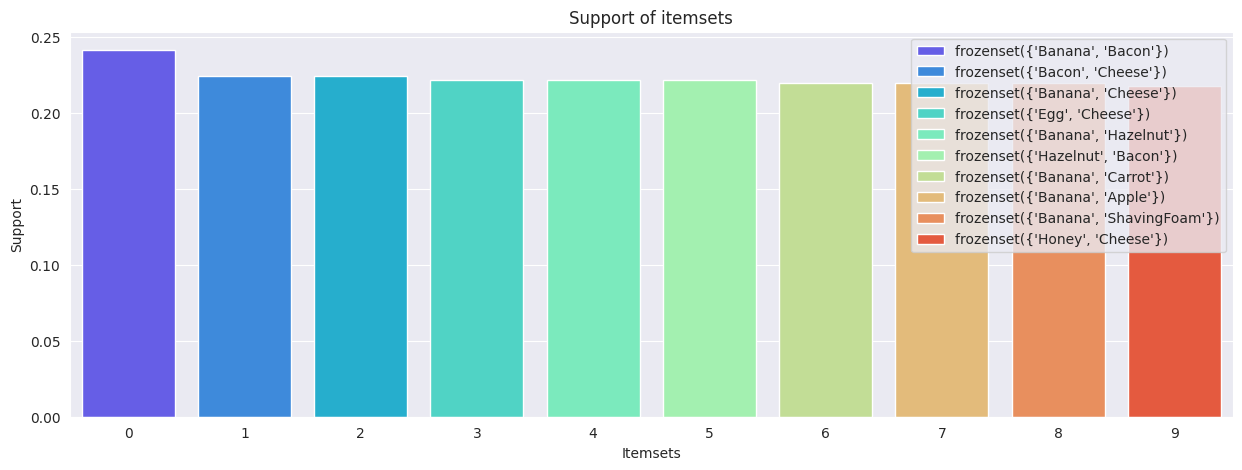

In [30]:
# Plot Bar graph

plt.figure(figsize=(15, 5))
sns.barplot(x= range(len(frequent_items_2)),
            y= frequent_items_2["support"],
            hue = [str(i) for i in frequent_items_2["itemsets"]],
            palette= "rainbow")
plt.title("Support of itemsets")
plt.xlabel("Itemsets")
plt.ylabel("Support")

### Observations

* Banana and Bacon are mostly purchased together.
* Banana are purchased with many items like Cheese, Hazelnut, Carrot, Apple and SavingFoam.
* Cheese is the next most popular item purchased with other items like Bacon, Banana and Honey.
* Bacon is purchased with other items like Banana, Cheese and Hazelnut.

## Association Rules Visualization

> To visualize the relationship between support and confidence of the rules.

Text(0.5, 1.0, 'Support vs Confidence')

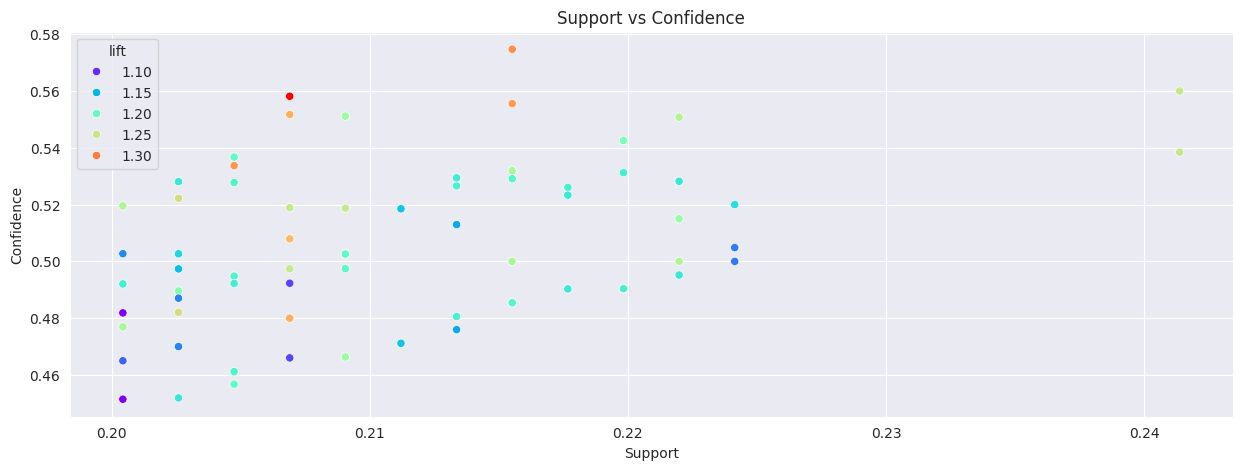

In [31]:
plt.figure(figsize=(15,5))
sns.scatterplot(x= rules["support"], y= rules["confidence"], sizes=rules["lift"], hue= rules["lift"], palette="rainbow")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Support vs Confidence")

### Observations

* No significant pattern present in Support and Confidence of metrics of rules.

### Visualize the connections between items with network graphs.

Text(0.5, 1.0, 'Network Graph of Association Rules')

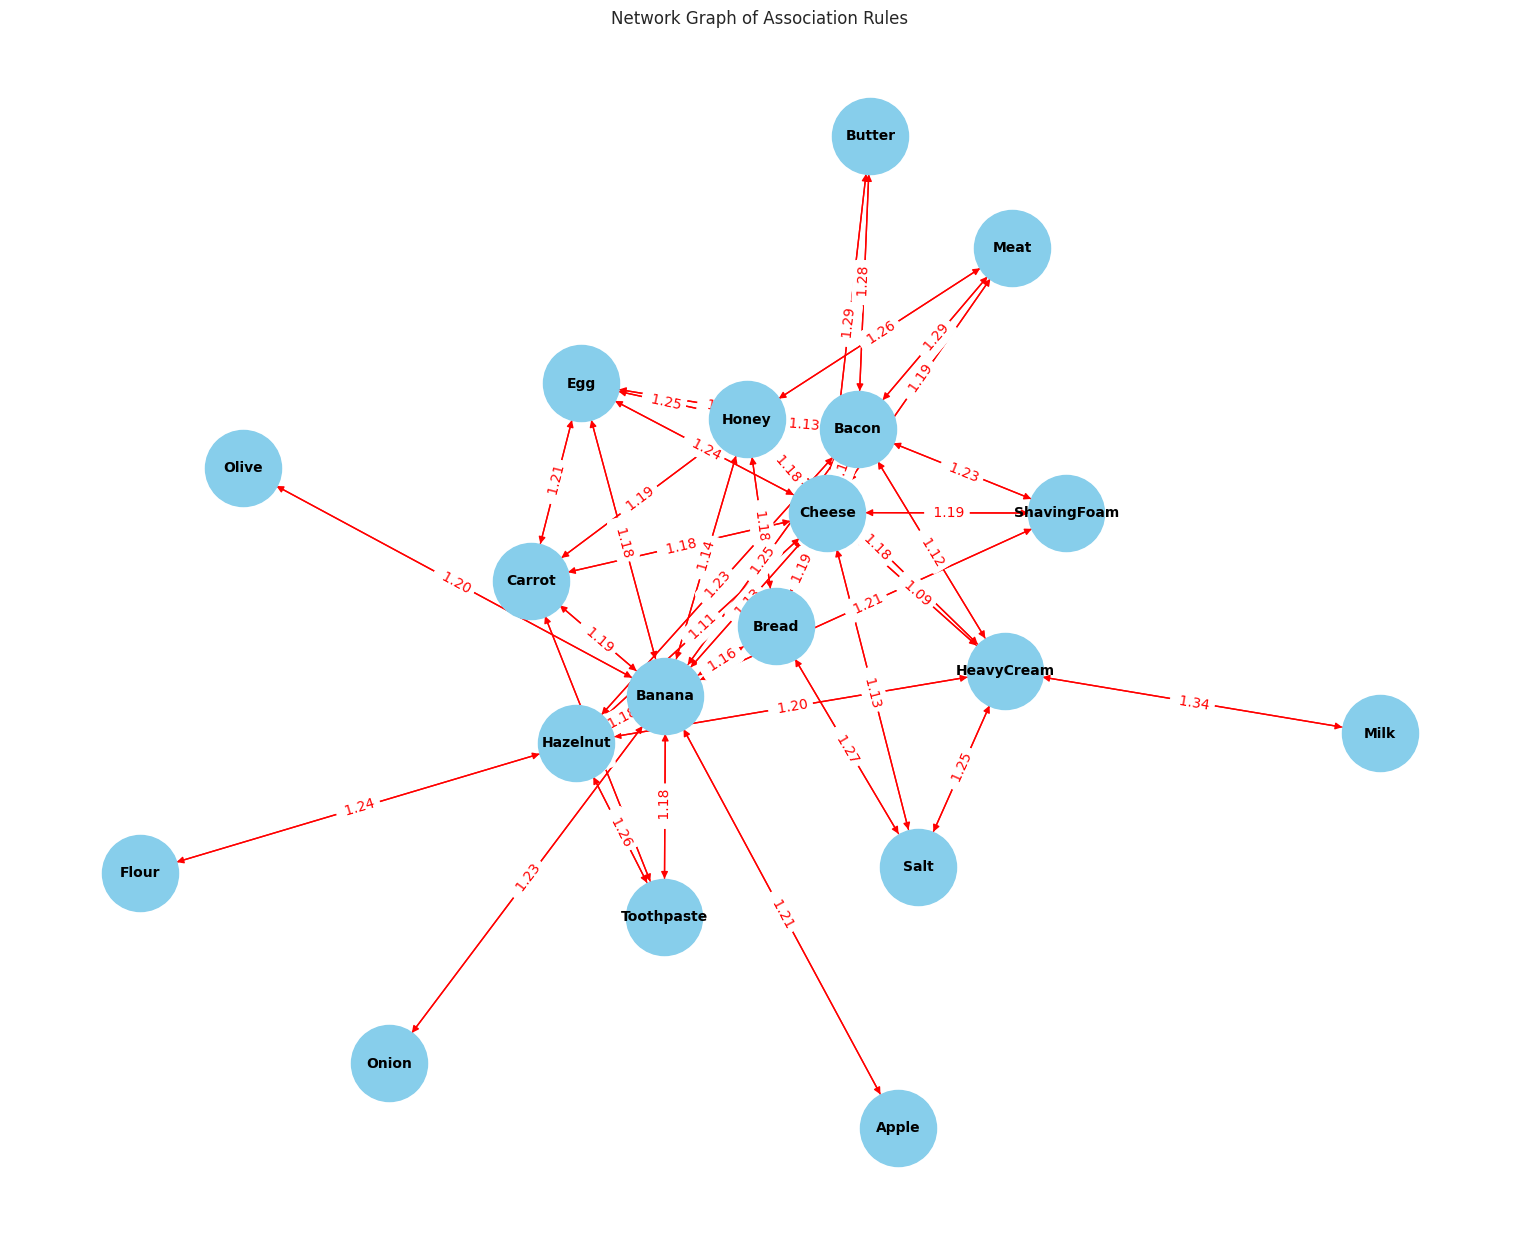

In [32]:
# Create a network graph object
G = nx.DiGraph()

# Add nodes and edges from rules
for _, rule in rules.iterrows():
  for antecedent in rule["antecedents"]:
    for consequent in rule["consequents"]:
      G.add_edge(antecedent, consequent, weight= rule["lift"])

# Draw the network plot
plt.figure(figsize=(15,12))
pos = nx.spring_layout(G, k= 1)
nx.draw(G, pos, with_labels= True, node_size= 3000, node_color= "skyblue", font_size= 10, font_weight= "bold", edge_color= "red")
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels= {(u, v): f'{d["weight"]: .2f}' for u, v, d in G.edges(data= True)}, font_color= "red")
plt.title("Network Graph of Association Rules")

### Observations

* There are strong association present among some items like Banana, Bacon, Cheese, Bread, Honey, Carrot, Hazelnut, ShavingCream and HeavyCream.
* Toothpaste, Salt, Eggs, Butter and Meat have medium association with other.
* Apple, Onion, Flour, Olive and Mik Doesn't lowest association with other.
* Cucumber, Shampoo are isolated items. They are not associated with other.
